In [1]:
!pip install cx_Oracle
!pip install cx_Oracle --upgrade

  Attempting uninstall: cx-Oracle
    Found existing installation: cx-Oracle 8.0.1
    Uninstalling cx-Oracle-8.0.1:
      Successfully uninstalled cx-Oracle-8.0.1


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import cx_Oracle
import pandas as pd
import numpy as np

import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [3]:
query='''
select * from w_s_d_fcst3_v2
where stylecolorid in  (select stylecolorid from w_s_d_fcst3_v2 group by stylecolorid having sum(fact_sales) > 500)
'''

try:  
    dsn_tns = cx_Oracle.makedsn('ex6s-scan.gksm.local', '1521', service_name='forecast_primary')
    connection = cx_Oracle.connect('FORECAST', 'Fcst17', dsn_tns)
    pull_mod=pd.read_sql(query,connection)
     
    connection.commit()

except (Exception, cx_Oracle.Error) as error :  
    if(connection):  
        print("Error", error)  
finally:  
    if(connection):   
        connection.close() 

In [7]:
pull_mod.shape

(373506, 41)

In [8]:
pull_mod.columns

Index(['IS_PRK', 'STYLECOLORID', 'STOREID', 'DATE_', 'SEASON', 'INTAKEDATE',
       'EXITDATE', 'DATE_MODEL_BEG', 'DATE_MODEL_END', 'FIRST_SEASON_D',
       'LAST_SEASON_D', 'WAREGROUP', 'WARECATEGORY', 'WARETRADEGROUP',
       'WARETRADESUBGROUP', 'WARETYPE', 'AGE1', 'REGION', 'PROJECT', 'QTYPL',
       'QTYUPA', 'FCST1', 'FCST2', 'FACT_SALES', 'KOEF_S_F1_F1',
       'KOEF_S_F2_F1', 'FCST1_COR1', 'FCST2_COR1', 'KOEF_S_F1_COR1',
       'KOEF_S_F2_COR1', 'FCST1_COR2', 'FCST2_COR2', 'KOEF_S_F1_COR2',
       'KOEF_S_F2_COR2', 'FCST1_COR3', 'FCST2_COR3', 'KOEF_S_F1_COR3',
       'KOEF_S_F2_COR3', 'SAL_V1', 'FCST_V1', 'KOEF_V1'],
      dtype='object')

In [10]:
pull_mod = pull_mod[['IS_PRK', 'STYLECOLORID', 'STOREID', 'DATE_', 'SEASON', 'INTAKEDATE',
       'EXITDATE', 'WAREGROUP', 'WARECATEGORY', 'WARETRADEGROUP',
       'WARETRADESUBGROUP', 'WARETYPE', 'AGE1', 'REGION', 'QTYPL',
       'QTYUPA', 'FCST1', 'FCST2', 'FACT_SALES', 'KOEF_S_F1_F1',
       'KOEF_S_F2_F1', 'FCST1_COR1', 'FCST2_COR1', 'KOEF_S_F1_COR1',
       'KOEF_S_F2_COR1', 'FCST1_COR2', 'FCST2_COR2', 'KOEF_S_F1_COR2',
       'KOEF_S_F2_COR2', 'FCST1_COR3', 'FCST2_COR3', 'KOEF_S_F1_COR3',
       'KOEF_S_F2_COR3', 'SAL_V1', 'FCST_V1', 'KOEF_V1']]

In [12]:
pull_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373506 entries, 0 to 373505
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   IS_PRK             373506 non-null  int64         
 1   STYLECOLORID       373506 non-null  object        
 2   STOREID            373506 non-null  int64         
 3   DATE_              373506 non-null  datetime64[ns]
 4   SEASON             373506 non-null  object        
 5   INTAKEDATE         373506 non-null  datetime64[ns]
 6   EXITDATE           373506 non-null  datetime64[ns]
 7   WAREGROUP          373506 non-null  object        
 8   WARECATEGORY       373506 non-null  object        
 9   WARETRADEGROUP     373506 non-null  object        
 10  WARETRADESUBGROUP  373506 non-null  object        
 11  WARETYPE           373506 non-null  object        
 12  AGE1               373506 non-null  object        
 13  REGION             373506 non-null  object  

In [13]:
pull_mod.describe()

,IS_PRK,STOREID,QTYPL,QTYUPA,FCST1,FCST2,FACT_SALES,KOEF_S_F1_F1,KOEF_S_F2_F1,FCST1_COR1,...,FCST2_COR2,KOEF_S_F1_COR2,KOEF_S_F2_COR2,FCST1_COR3,FCST2_COR3,KOEF_S_F1_COR3,KOEF_S_F2_COR3,SAL_V1,FCST_V1,KOEF_V1
count,373506.000000,373506.000000,373506.00000,373506.000000,373506.000000,373506.000000,373506.000000,373506.000000,373506.000000,373506.000000,...,373506.000000,373506.000000,373506.000000,373506.000000,373506.000000,373506.000000,373506.000000,373506.000000,373506.000000,373506.000000
mean,0.992886,1555.459645,58.17894,15.648172,1.588956,1.739094,1.648397,1.875082,1.898380,1.644508,...,1.750612,1.805389,1.827872,1.567485,1.705937,1.794706,1.816787,1.629808,1.576972,1.766071
std,0.084042,1191.937991,204.62405,19.308078,6.600031,7.241628,4.480768,2.180651,2.357133,5.726793,...,6.522178,1.844818,2.049434,5.529389,6.237223,1.778881,1.990023,4.459160,4.630835,1.116779
min,0.000000,5.000000,3.00000,3.000000,0.001335,0.003483,0.000000,1.000000,1.000000,0.000000,...,0.003483,1.000000,1.000000,0.001335,0.003483,1.000000,1.000000,0.000000,0.000000,1.000000
25%,1.000000,579.000000,16.00000,8.000000,0.372218,0.442398,0.000000,1.000000,1.000000,0.333937,...,0.437399,1.000000,1.000000,0.371396,0.438232,1.000000,1.000000,0.000000,0.270344,1.000000
50%,1.000000,948.000000,28.00000,10.000000,0.713050,0.787664,1.000000,2.000000,2.000000,0.758421,...,0.824432,2.000000,2.000000,0.749494,0.818301,2.000000,2.000000,1.000000,0.697422,1.797238
75%,1.000000,3050.000000,52.00000,12.000000,1.376896,1.479541,2.000000,2.000000,2.000000,1.562461,...,1.563921,2.000000,2.000000,1.441830,1.531785,2.000000,2.000000,2.000000,1.380034,2.000000
max,1.000000,4798.000000,29568.00000,240.000000,1139.973122,1346.082034,234.000000,848.579830,1002.004382,1139.973122,...,1346.082034,848.579830,1002.004382,1139.973122,1346.082034,848.579830,1002.004382,234.000000,364.267610,72.986386


In [57]:
gr_app = pull_mod[pull_mod.WAREGROUP == 'Одежда'][['DATE_','FACT_SALES','FCST2_COR2','FCST_V1']].groupby(['DATE_'], as_index=False, sort=True).sum().round()
gr_app

,DATE_,FACT_SALES,FCST2_COR2,FCST_V1
0,2019-11-03,8903,9950.0,9189.0
1,2019-11-17,421,761.0,580.0
2,2019-12-01,783,745.0,3.0
3,2019-12-08,4196,3732.0,801.0
4,2019-12-15,5328,5212.0,3910.0
5,2019-12-22,63720,65994.0,51606.0
6,2019-12-29,6690,6039.0,8523.0
7,2020-01-05,9505,17259.0,7629.0
8,2020-01-12,19824,21876.0,19540.0
9,2020-01-19,17785,14253.0,16300.0


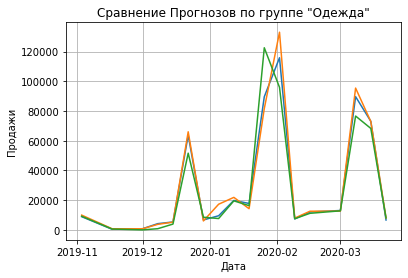

In [61]:
# Строим графики по дате 

X = gr_app[['DATE_']]
Y = gr_app[['FACT_SALES','FCST2_COR2','FCST_V1']]
plt.title('Сравнение Прогнозов по группе "Одежда"') # заголовок
plt.xlabel("Дата")         # ось абсцисс
plt.ylabel("Продажи")    # ось ординат
plt.grid()              # включение отображение сетки
plt.plot(X,Y)  # построение графика
plt.show()

In [63]:
gr_mod = pull_mod[pull_mod.STYLECOLORID == 'TRN-TB100TRN-.'][['DATE_','FACT_SALES','FCST2_COR2','FCST_V1']].groupby(['DATE_'], as_index=False, sort=True).sum().round()
gr_mod

,DATE_,FACT_SALES,FCST2_COR2,FCST_V1
0,2020-02-09,15841,25134.0,17246.0
1,2020-03-22,11939,17818.0,15236.0


# Сгруппированные по товарным категориям данные

In [72]:
query='''
select DATE_, WAREGROUP, WARECATEGORY, WARETRADEGROUP, WARETRADESUBGROUP, WARETYPE, AGE1
,sum(fcst1) fcst1
,sum(fcst2) fcst2
,sum(fact_sales) fact_sales
,sum(fcst1_cor1) fcst1_cor1
,sum(fcst1_cor2) fcst1_cor2
,sum(fcst1_cor3) fcst1_cor3
,sum(fcst2_cor1) fcst2_cor1
,sum(fcst2_cor2) fcst2_cor2
,sum(fcst2_cor3) fcst2_cor3
,sum(FCST_V1) FCST_V1
from w_s_d_fcst3_v2
group by DATE_, WAREGROUP, WARECATEGORY, WARETRADEGROUP, WARETRADESUBGROUP, WARETYPE, AGE1
'''

try:  
    dsn_tns = cx_Oracle.makedsn('ex6s-scan.gksm.local', '1521', service_name='forecast_primary')
    connection = cx_Oracle.connect('FORECAST', 'Fcst17', dsn_tns)
    t1=pd.read_sql(query,connection)
     
    connection.commit()

except (Exception, cx_Oracle.Error) as error :  
    if(connection):  
        print("Error", error)  
finally:  
    if(connection):   
        connection.close() 

In [73]:
t1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   DATE_              1190 non-null   datetime64[ns]
 1   WAREGROUP          1190 non-null   object        
 2   WARECATEGORY       1190 non-null   object        
 3   WARETRADEGROUP     1190 non-null   object        
 4   WARETRADESUBGROUP  1190 non-null   object        
 5   WARETYPE           1190 non-null   object        
 6   AGE1               1190 non-null   object        
 7   FCST1              1190 non-null   float64       
 8   FCST2              1190 non-null   float64       
 9   FACT_SALES         1190 non-null   int64         
 10  FCST1_COR1         1190 non-null   float64       
 11  FCST1_COR2         1190 non-null   float64       
 12  FCST1_COR3         1190 non-null   float64       
 13  FCST2_COR1         1190 non-null   float64       
 14  FCST2_CO

In [472]:
gr_app = t1[t1.WAREGROUP == 'Одежда'][['DATE_','FACT_SALES','FCST2', 'FCST2_COR2','FCST_V1']].groupby(['DATE_'], as_index=False, sort=True).sum().round()
gr_ftw = t1[t1.WAREGROUP == 'Обувь'][['DATE_','FACT_SALES','FCST2', 'FCST2_COR2','FCST_V1']].groupby(['DATE_'], as_index=False, sort=True).sum()
gr_app_spt = t1[(t1.WAREGROUP == 'Одежда') & (t1.WARECATEGORY == 'Спорт')][['DATE_','FACT_SALES','FCST2', 'FCST2_COR2','FCST_V1']].groupby(['DATE_'], as_index=False, sort=True).sum()
gr_app_out = t1[(t1.WAREGROUP == 'Одежда') & (t1.WARECATEGORY == 'Активный отдых')][['DATE_','FACT_SALES','FCST2', 'FCST2_COR2','FCST_V1']].groupby(['DATE_'], as_index=False, sort=True).sum()
gr_ftw_spt = t1[(t1.WAREGROUP == 'Обувь') & (t1.WARECATEGORY == 'Спорт')][['DATE_','FACT_SALES','FCST2', 'FCST2_COR2','FCST_V1']].groupby(['DATE_'], as_index=False, sort=True).sum()
gr_ftw_out = t1[(t1.WAREGROUP == 'Обувь') & (t1.WARECATEGORY == 'Активный отдых')][['DATE_','FACT_SALES','FCST2', 'FCST2_COR2','FCST_V1']].groupby(['DATE_'], as_index=False, sort=True).sum()

# Графики

In [513]:
# Сравнение Прогнозов по группе "Одежда"
fig = go.Figure()
fig.add_trace(go.Bar(x=gr_app['DATE_'], y=gr_app['FACT_SALES'], name='<b>Факт</b>'))
fig.add_trace(go.Scatter(x=gr_app['DATE_'], y=gr_app['FCST2_COR2'], name='<b>Наш прогноз</b>',line=dict(color='orange', width=2)))
fig.add_trace(go.Scatter(x=gr_app['DATE_'], y=gr_app['FCST_V1'], name='<b>ML прогноз</b>',line=dict(color='forestgreen', width=2)))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  #xaxis_title="Дата",
                  yaxis_title="Продажи",
                  margin=dict(l=0, r=0, t=50, b=0))
fig.update_layout(
    title={
        'text': '<b>Сравнение Прогнозов по группе "Одежда"</b>',
        #'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font_family':"Times New Roman",
        'font_size': 24})
#         font=dict(
#             family="Arial",
#             size=20,
#             color='#000000'
#        )
# marker=go.Marker(
#         color = 'red',
#         line=go.Line(
#             color='red',  # set bar border color
#             width= 440,      # set bar border width
#         )
#py.image.save_as(fig, filename='chart_app.png')
fig.show()

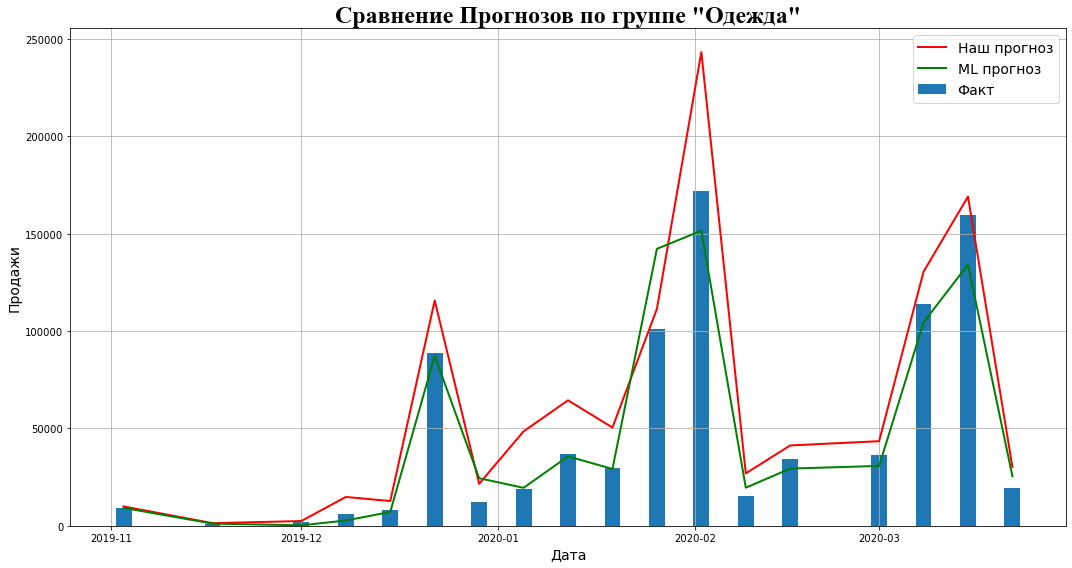

In [432]:
# Строим графики по дате Сравнение Прогнозов по группе "Одежда"
#from scipy.interpolate import spline

X = gr_app['DATE_']
Y1 = gr_app['FACT_SALES']
Y2 = gr_app['FCST2_COR2']
Y3 = gr_app['FCST_V1']
plt.figure(figsize=(15, 8))
plt.title('Сравнение Прогнозов по группе "Одежда"', fontsize=24, fontname='Times New Roman',fontweight='bold') # заголовок
plt.xlabel("Дата", fontsize=14)         # ось абсцисс
plt.ylabel("Продажи", fontsize=14)    # ось ординат
plt.grid(True)                # включение отображение сетки
plt.bar(X,Y1,width=2.5,label='Факт') # построение графика
plt.plot(X,Y2,'r',linewidth=2.0) # построение графика
plt.plot(X,Y3,'g',linewidth=2.0) # построение графика

# x_sm = np.array(X)
# y_sm = np.array(Y2)
# x_smooth = np.linspace(x_sm.min(), x_sm.max(), 200)
# y_smooth = spline(x, y, x_smooth)
# plt.plot(x_smooth, y_smooth, 'red', linewidth=1)

plt.legend(['Наш прогноз','ML прогноз','Факт'], fontsize=14)
plt.tight_layout() # подгонка области сохранения графика
plt.savefig('chart_app.png')
plt.show()

In [504]:
# Строим графики по дате Сравнение Прогнозов по группе "Одежда-Спорт"

X = gr_app_spt[['DATE_']]
Y = gr_app_spt[['FACT_SALES', 'FCST2_COR2','FCST_V1']]
fig = go.Figure()
fig.add_trace(go.Bar(x=gr_app_spt['DATE_'], y=gr_app_spt['FACT_SALES'], name='<b>Факт</b>'))
fig.add_trace(go.Scatter(x=gr_app_spt['DATE_'], y=gr_app_spt['FCST2_COR2'],line=dict(color='orange', width=2), name='<b>Наш прогноз</b>'))
fig.add_trace(go.Scatter(x=gr_app_spt['DATE_'], y=gr_app_spt['FCST_V1'],line=dict(color='forestgreen', width=2), name='<b>ML прогноз</b>'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  #xaxis_title="Дата",
                  yaxis_title="Продажи",
                  margin=dict(l=0, r=0, t=50, b=0))
fig.update_layout(
    title={
        'text': '<b>Сравнение Прогнозов по группе "Одежда-Спорт"</b>',
        #'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font_family':"Times New Roman",
        'font_size': 24})
fig.show()

In [505]:
# Строим графики по дате Сравнение Прогнозов по группе "Одежда-Активный отдых"

X = gr_app_out[['DATE_']]
Y = gr_app_out[['FACT_SALES', 'FCST2_COR2','FCST_V1']]
fig = go.Figure()
fig.add_trace(go.Bar(x=gr_app_out['DATE_'], y=gr_app_out['FACT_SALES'], name='<b>Факт</b>'))
fig.add_trace(go.Scatter(x=gr_app_out['DATE_'], y=gr_app_out['FCST2_COR2'],line=dict(color='orange', width=2), name='<b>Наш прогноз</b>'))
fig.add_trace(go.Scatter(x=gr_app_out['DATE_'], y=gr_app_out['FCST_V1'],line=dict(color='forestgreen', width=2), name='<b>ML прогноз</b>'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  #xaxis_title="Дата",
                  yaxis_title="Продажи",
                  margin=dict(l=0, r=0, t=50, b=0))
fig.update_layout(
    title={
        'text': '<b>Сравнение Прогнозов по группе "Одежда-Активный отдых"</b>',
        #'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font_family':"Times New Roman",
        'font_size': 24})
fig.show()

In [506]:
# Строим графики по дате Сравнение Прогнозов по группе "Обувь"

X = gr_ftw[['DATE_']]
Y = gr_ftw[['FACT_SALES', 'FCST2_COR2','FCST_V1']]
fig = go.Figure()
fig.add_trace(go.Bar(x=gr_ftw['DATE_'], y=gr_ftw['FACT_SALES'], name='<b>Факт</b>'))
fig.add_trace(go.Scatter(x=gr_ftw['DATE_'], y=gr_ftw['FCST2_COR2'],line=dict(color='orange', width=2), name='<b>Наш прогноз</b>'))
fig.add_trace(go.Scatter(x=gr_ftw['DATE_'], y=gr_ftw['FCST_V1'],line=dict(color='forestgreen', width=2), name='<b>ML прогноз</b>'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  #xaxis_title="Дата",
                  yaxis_title="Продажи",
                  margin=dict(l=0, r=0, t=50, b=0))
fig.update_layout(
    title={
        'text': '<b>Сравнение Прогнозов по группе "Обувь"</b>',
        #'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font_family':"Times New Roman",
        'font_size': 24})
fig.show()

In [511]:
# Строим графики по дате Сравнение Прогнозов по группе "Обувь-Спорт"

X = gr_ftw_spt[['DATE_']]
Y = gr_ftw_spt[['FACT_SALES', 'FCST2_COR2','FCST_V1']]
fig = go.Figure()
fig.add_trace(go.Bar(x=gr_ftw_spt['DATE_'], y=gr_ftw_spt['FACT_SALES'], name='<b>Факт</b>'))
fig.add_trace(go.Scatter(x=gr_ftw_spt['DATE_'], y=gr_ftw_spt['FCST2_COR2'],line=dict(color='orange', width=2), name='<b>Наш прогноз</b>'))
fig.add_trace(go.Scatter(x=gr_ftw_spt['DATE_'], y=gr_ftw_spt['FCST_V1'],line=dict(color='forestgreen', width=2), name='<b>ML прогноз</b>'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  #xaxis_title="Дата",
                  yaxis_title="Продажи",
                  margin=dict(l=0, r=0, t=50, b=0))
fig.update_layout(
    title={
        'text': '<b>Сравнение Прогнозов по группе "Обувь-Спорт"</b>',
        #'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font_family':"Times New Roman",
        'font_size': 24})
fig.show()

In [512]:
# Строим графики по дате Сравнение Прогнозов по группе "Обувь-Активный отдых"

X = gr_ftw_out[['DATE_']]
Y = gr_ftw_out[['FACT_SALES', 'FCST2_COR2','FCST_V1']]
fig = go.Figure()
fig.add_trace(go.Bar(x=gr_ftw_out['DATE_'], y=gr_ftw_out['FACT_SALES'], name='<b>Факт</b>'))
fig.add_trace(go.Scatter(x=gr_ftw_out['DATE_'], y=gr_ftw_out['FCST2_COR2'],line=dict(color='orange', width=2), name='<b>Наш прогноз</b>'))
fig.add_trace(go.Scatter(x=gr_ftw_out['DATE_'], y=gr_ftw_out['FCST_V1'],line=dict(color='forestgreen', width=2), name='<b>ML прогноз</b>'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  #xaxis_title="Дата",
                  yaxis_title="Продажи",
                  margin=dict(l=0, r=0, t=50, b=0))
fig.update_layout(
    title={
        'text': '<b>Сравнение Прогнозов по группе "Обувь-Активный отдых"</b>',
        #'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font_family':"Times New Roman",
        'font_size': 24})
fig.show()

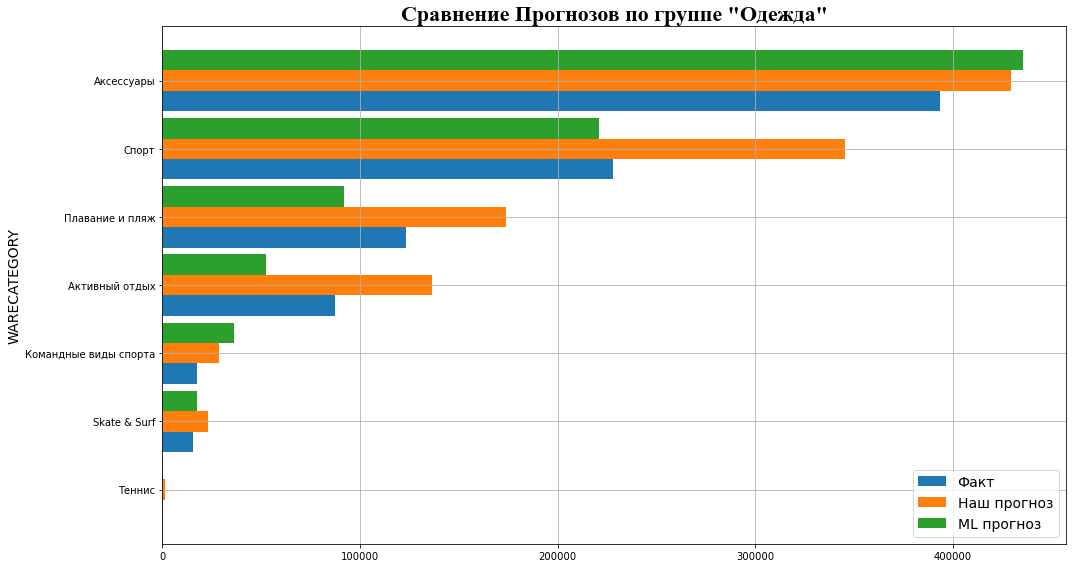

In [320]:
# Одежда
fig, ax=plt.subplots(figsize=(15,8))
width = 0.3
x1 = [x-width for x in range(len(gr_app2['WARECATEGORY']))]
x2 = [x+width for x in range(len(gr_app2['WARECATEGORY']))]
X = [el for el in gr_app2['WARECATEGORY']]
Y1 = gr_app2['Факт']
Y2 = gr_app2['Наш прогноз']
Y3 = gr_app2['ML прогноз']
ax.set_title('Сравнение Прогнозов по группе "Одежда"', fontsize=22, fontname='Times New Roman', fontweight='bold', color='black')
ax.set_ylabel("WARECATEGORY", fontsize=14)
ax.grid(True)  # включение отображение сетки
ax.barh(x1,Y1, width)
ax.barh(X,Y2, width)            
ax.barh(x2,Y3, width)         
ax.legend(['Факт', 'Наш прогноз', 'ML прогноз'], fontsize=14, loc=4)
fig.tight_layout() # подгонка области сохранения графика
fig.savefig('chart_app2.png')

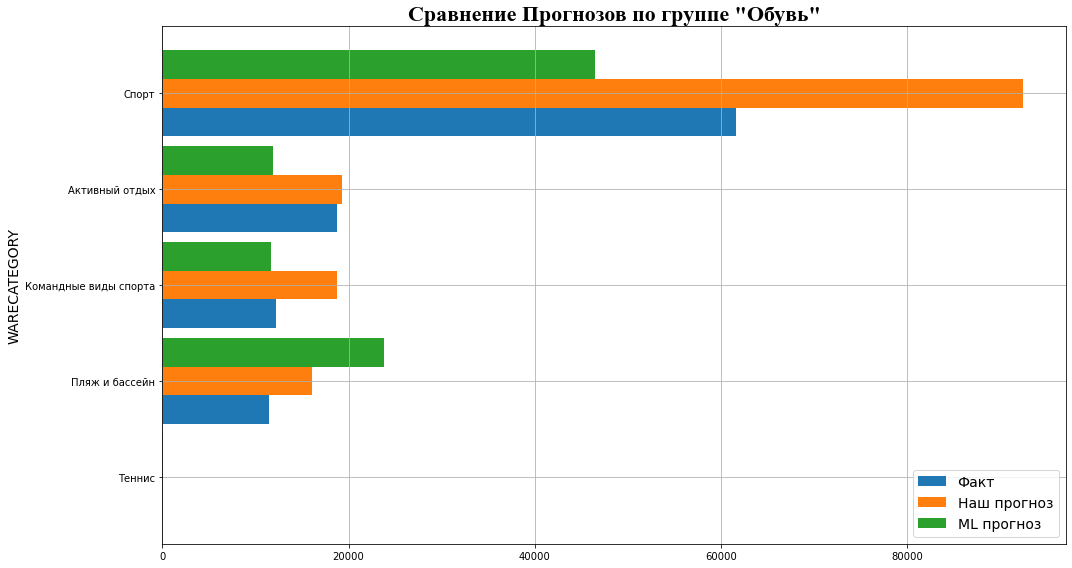

In [321]:
# Обувь
fig, ax=plt.subplots(figsize=(15,8))
width = 0.3
x1 = [x-width for x in range(len(gr_ftw2['WARECATEGORY']))]
x2 = [x+width for x in range(len(gr_ftw2['WARECATEGORY']))]
X = [el for el in gr_ftw2['WARECATEGORY']]
Y1 = gr_ftw2['Факт']
Y2 = gr_ftw2['Наш прогноз']
Y3 = gr_ftw2['ML прогноз']
ax.set_title('Сравнение Прогнозов по группе "Обувь"', fontsize=22, fontname='Times New Roman', fontweight='bold', color='black')
ax.set_ylabel("WARECATEGORY", fontsize=14)
ax.grid(True)  # включение отображение сетки
ax.barh(x1,Y1, width)
ax.barh(X,Y2, width)            
ax.barh(x2,Y3, width)         
ax.legend(['Факт', 'Наш прогноз', 'ML прогноз'], fontsize=14, loc=4)
fig.tight_layout() # подгонка области сохранения графика
fig.savefig('chart_ftw2.png')

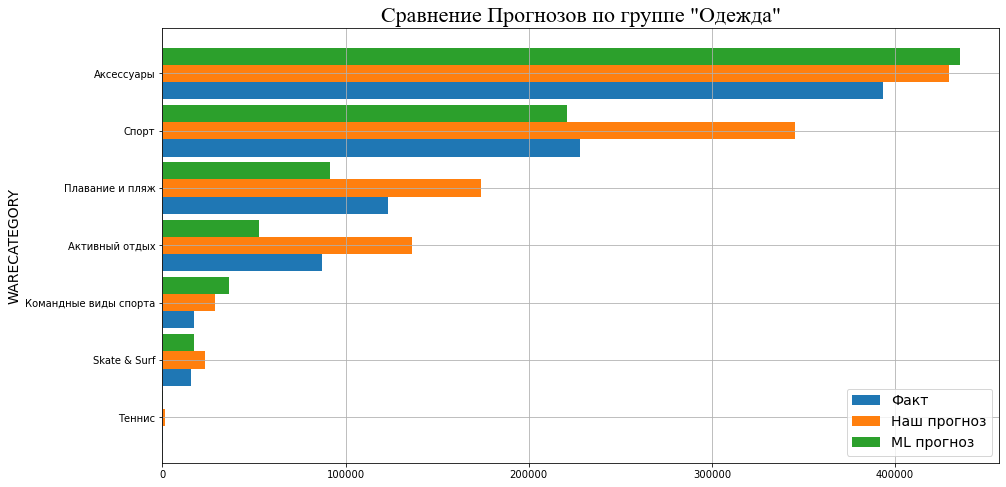

In [281]:
# Строим графики по дате Сравнение Прогнозов по группе "Одежда"
width = 0.3
x1 = [x-width for x in range(len(gr_app2['WARECATEGORY']))]
x2 = [x+width for x in range(len(gr_app2['WARECATEGORY']))]
X = [el for el in gr_app2['WARECATEGORY']]
Y1 = gr_app2['Факт']
Y2 = gr_app2['Наш прогноз']
Y3 = gr_app2['ML прогноз']
plt.figure(figsize=(15, 8))
plt.title('Сравнение Прогнозов по группе "Одежда"', fontsize=22, fontname='Times New Roman') # заголовок
#plt.xlabel("Кол-во, шт.", fontsize=14)         # ось абсцисс
plt.ylabel("WARECATEGORY", fontsize=14)    # ось ординат
plt.grid(True)                # включение отображение сетки
plt.barh(x1,Y1, width, label='Факт')             # построение графика
plt.barh(X,Y2, width, label='Наш прогноз')              # построение графика
plt.barh(x2,Y3, width, label='ML прогноз')              # построение графика
plt.legend(['Факт', 'Наш прогноз', 'ML прогноз'], fontsize=14, loc=4)
plt.savefig('chart_app2.png')
fig.tight_layout() # подгонка области сохранения графика
plt.show()

In [247]:
print(x1)
print(x2)

[-0.3, 0.7, 1.7, 2.7, 3.7, 4.7, 5.7]
[0.3, 1.3, 2.3, 3.3, 4.3, 5.3, 6.3]


In [181]:
gr_app2 = t1[t1.WAREGROUP == 'Одежда'][['WARECATEGORY','FACT_SALES','FCST2', 'FCST2_COR2','FCST_V1']].groupby(['WARECATEGORY'], as_index=False).sum().round().sort_values('FACT_SALES')
gr_app2.columns = ['WARECATEGORY','Факт', 'Наш прогноз норм', 'Наш прогноз', 'ML прогноз']
gr_app2

,WARECATEGORY,Факт,Наш прогноз норм,Наш прогноз,ML прогноз
6,Теннис,526,1815.0,1532.0,383.0
0,Skate & Surf,15598,19754.0,23201.0,17291.0
3,Командные виды спорта,17395,30691.0,28496.0,36388.0
2,Активный отдых,87059,150616.0,136500.0,52467.0
4,Плавание и пляж,123307,185172.0,173687.0,91680.0
5,Спорт,227997,372209.0,345135.0,220647.0
1,Аксессуары,393223,433918.0,429443.0,435192.0


In [182]:
gr_ftw2 = t1[t1.WAREGROUP == 'Обувь'][['WARECATEGORY','FACT_SALES','FCST2', 'FCST2_COR2','FCST_V1']].groupby(['WARECATEGORY'], as_index=False).sum().round().sort_values('FACT_SALES')
gr_ftw2.columns = ['WARECATEGORY','Факт', 'Наш прогноз норм', 'Наш прогноз', 'ML прогноз']
gr_ftw2

,WARECATEGORY,Факт,Наш прогноз норм,Наш прогноз,ML прогноз
4,Теннис,12,71.0,56.0,10.0
2,Пляж и бассейн,11404,17139.0,16040.0,23780.0
1,Командные виды спорта,12226,20705.0,18777.0,11654.0
0,Активный отдых,18738,22062.0,19276.0,11916.0
3,Спорт,61559,103717.0,92383.0,46495.0


In [163]:
np.arange(7)

array([0, 1, 2, 3, 4, 5, 6])

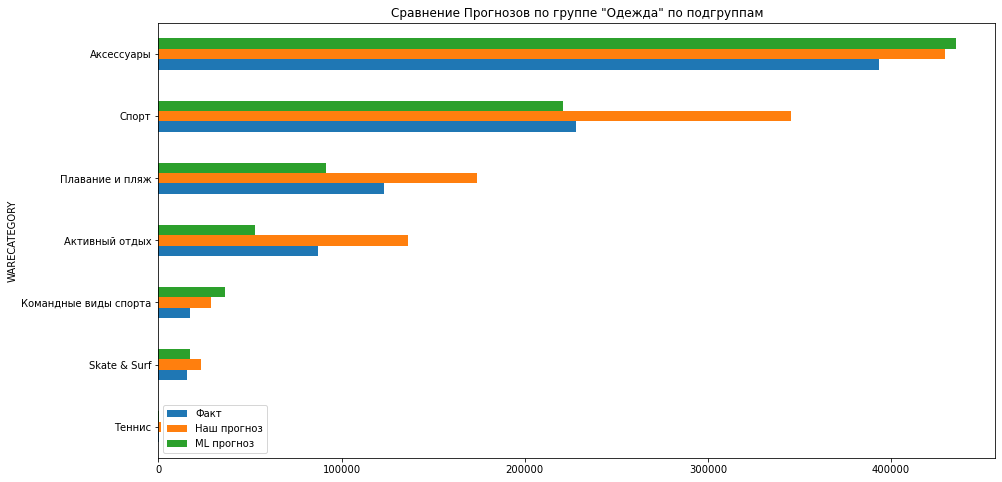

In [183]:
# Строим графики по дате Сравнение Прогнозов по группе "Одежда" по подгруппам

bar_app = gr_app2.plot(kind='barh', x='WARECATEGORY', y=['Факт', 'Наш прогноз', 'ML прогноз'],\
title='Сравнение Прогнозов по группе "Одежда" по подгруппам', figsize=(15, 8))            # построение графика
fig = bar_app.get_figure()
fig.savefig("chart_app2.png")

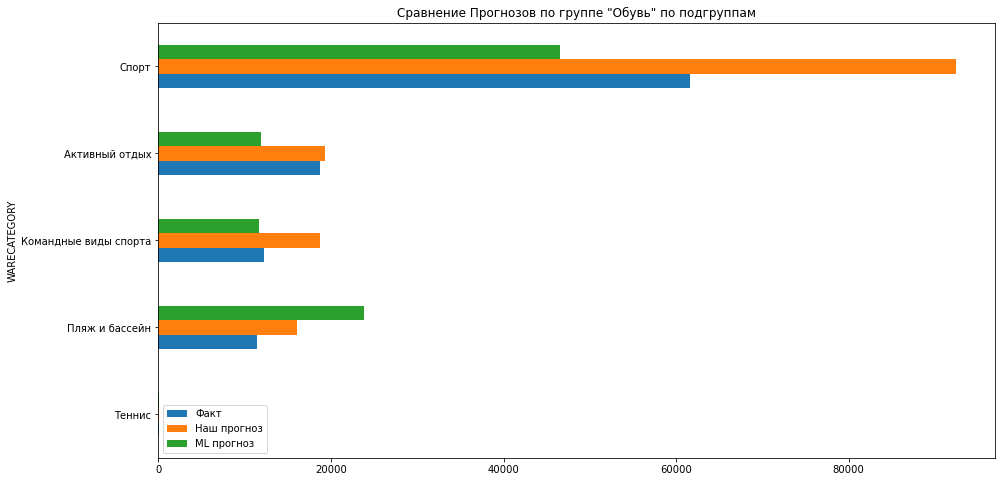

In [184]:
# Строим графики по дате Сравнение Прогнозов по группе "Обувь" по подгруппам

bar_ftw = gr_ftw2.plot(kind='barh', x='WARECATEGORY', y=['Факт', 'Наш прогноз', 'ML прогноз'],\
title='Сравнение Прогнозов по группе "Обувь" по подгруппам', figsize=(15, 8))            # построение графика
fig = bar_ftw.get_figure()
fig.savefig("chart_ftw2.png")

In [211]:
x = [el for el in gr_app2['WARECATEGORY']]
x

['Теннис',
 'Skate & Surf',
 'Командные виды спорта',
 'Активный отдых',
 'Плавание и пляж',
 'Спорт',
 'Аксессуары']

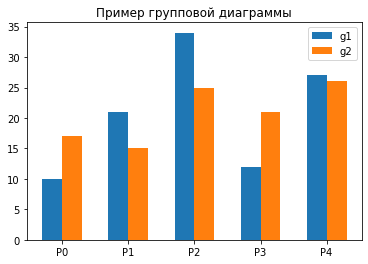

In [225]:
cat_par = [f"P{i}" for i in range(5)]

g1 = [10, 21, 34, 12, 27] 
g2 = [17, 15, 25, 21, 26]

width = 0.3

x = np.arange(len(cat_par))

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, g1, width, label='g1')
rects2 = ax.bar(x + width/2, g2, width, label='g2')

ax.set_title('Пример групповой диаграммы')
ax.set_xticks(x)
ax.set_xticklabels(cat_par)
ax.legend()